# Laboratorio 4 - Aprendizaje profundo para la clasificación de imágenes


Siga las instrucciones en negritas para completar el laboratorio.

------------

## El reto

**Su tarea es la de construir un clasificador de imágenes usando Keras (Tensorflow) y Redes Neuronales Convolucionales (CNN) para un conjunto de datos conocido como "Fashion MNIST dataset""
. Este conjunto de datos incluye 10 etiquetas de diferentes tipos de ropa con imágenes de 28 by 28 *escalagris*. Hay un conjunto de datos de entrenamiento de 60,000 imágenes y un conjunto de datos de prueba de 10,000 imágenes.**

    Etiqueta	Descripción
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

## Los datos

**Tarea 1: Ejecute el siguiente código para descargar los datos usando Keras.**

In [17]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

(X_entreno, y_entreno), (X_prueba, y_prueba) = fashion_mnist.load_data()

## Visualización de los Datos

**TAREA 2: Utilice matplotlib para visualizar una imagen del conjunto de datos.  Puede ser cualquier imagen del conjunto de datos.**

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
X_prueba.shape

(10000, 28, 28)

In [20]:
X_entreno.shape

(60000, 28, 28)

In [21]:
X_entreno[0].shape

(28, 28)

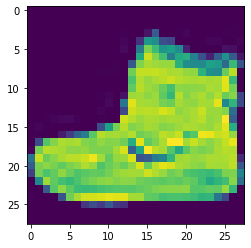

In [22]:
plt.imshow(X_entreno[0])

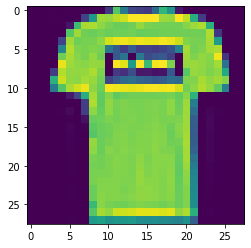

In [23]:
plt.imshow(X_entreno[1])

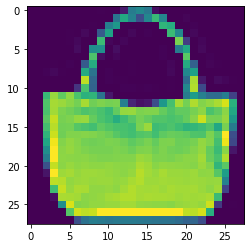

In [24]:
plt.imshow(X_entreno[100])

## Preprocesamiento de los Datos

**TAREA 3: Normalice los datos X entreno y X prueba dividiendo por el valor máximo de los arreglos de las imágenes.**

In [25]:
X_entreno = X_entreno / 255

X_prueba = X_prueba / 255


**TAREA 4: Cambie el formato de los arreglos X para que incluyan una 4rta dimensión del canal de color. Similar a lo que se hizo en clase para el conjunto de datos MNIST de números.**

In [26]:
X_entreno = X_entreno.reshape(X_entreno.shape[0], 28, 28,1)


In [27]:
X_prueba = X_prueba.reshape(X_prueba.shape[0], 28, 28,1)


In [28]:
(X_entreno.shape, X_prueba.shape)

((60000, 28, 28, 1), (10000, 28, 28, 1))

**TAREA 5: Convierta los valores de y_entreno y y_prueba para que estén "one-hot encoded" para poder hacer un análisis categórico con Keras.**

In [29]:
y_cat_prueba = to_categorical(y_prueba, 10)

In [30]:
y_cat_entreno = to_categorical(y_entreno, 10)

In [31]:
(y_cat_prueba.shape, y_cat_entreno.shape)

((10000, 10), (60000, 10))

## Configuración del Modelo

**TAREA 6: Utilice Keras para crear un modelo que contenga, al menos, las siguientes capas (pero siéntase en libertad de experimentar):**

* Capa "2D Convolutional", filtros = 32 y tamaño_kernel = (4, 4)
* Capa de "Pooling""
 de tamaño = (2, 2)

* Capa de Aplanado
* Capa Densa (128 unidades, pero siéntase en libertad de "jugar"con este valor), activación RELU

* Una capa Final Densa de 10 unidades con activación softmax

**Luego compile el modelo con estos parámetros: loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy']**

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [33]:
modelo = Sequential()

In [34]:
modelo.add(Conv2D(filters = 32, kernel_size = (4, 4), input_shape = (28, 28, 1), activation = 'relu'))

In [35]:
modelo.add(MaxPool2D(pool_size = (2, 2)))

In [36]:
modelo.add(Flatten())

In [37]:
modelo.add(Dense(128, activation = 'relu'))

In [38]:
modelo.add(Dense(10, activation = 'softmax'))

In [39]:
modelo.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

In [40]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
__________________________________________________

### Entrenamiento del Modelo
**TAREA 6: Entrene/Ajuste el modelo con el conjunto X_entreno set. La cantidad de épocas le queda a Ud determinar.**

In [41]:
from tensorflow.keras.callbacks import EarlyStopping

In [42]:
detencion_temprana = EarlyStopping(monitor = 'val_loss', patience = 2)

In [43]:
modelo.fit(X_entreno, y_cat_entreno, epochs = 10, validation_data = (X_prueba,y_cat_prueba),
           callbacks = [detencion_temprana])

Epoch 1/10
1875/1875 [==============================] - 37s 19ms/step - loss: 0.3936 - accuracy: 0.8590 - val_loss: 0.3325 - val_accuracy: 0.8808
Epoch 2/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.2737 - accuracy: 0.9017 - val_loss: 0.2904 - val_accuracy: 0.8974
Epoch 3/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2371 - accuracy: 0.9141 - val_loss: 0.2748 - val_accuracy: 0.9044
Epoch 4/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.2135 - accuracy: 0.9225 - val_loss: 0.2685 - val_accuracy: 0.9086
Epoch 5/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.1942 - accuracy: 0.9304 - val_loss: 0.2741 - val_accuracy: 0.9069
Epoch 6/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.1792 - accuracy: 0.9360 - val_loss: 0.2873 - val_accuracy: 0.9073


### Evaluación del Modelo

**TAREA 7: Muestre los valores de [accuracy, precision, recall, f1-score] que logró el modelo con el conjunto de datos X_prueba data set. Tenga en mente que hay múltiples formas de hacer esto.  Sin embargo, le recomendamos que utilice el mismo procedimiento usado mencionado en la parte de intuición, en clase.**

In [44]:
modelo.metrics_names

['loss', 'accuracy']

In [45]:
perdidas = pd.DataFrame(modelo.history.history)

In [46]:
perdidas.head()

,loss,accuracy,val_loss,val_accuracy
0,0.393566,0.859000,0.332462,0.8808
1,0.273679,0.901683,0.290352,0.8974
2,0.237144,0.914067,0.274772,0.9044
3,0.213540,0.922450,0.268506,0.9086
4,0.194212,0.930383,0.274071,0.9069


<AxesSubplot:>

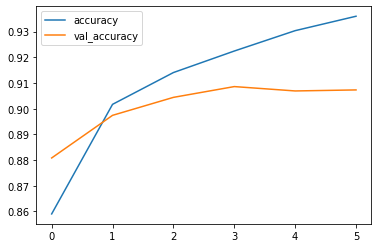

In [47]:
perdidas[['accuracy', 'val_accuracy']].plot()

<AxesSubplot:>

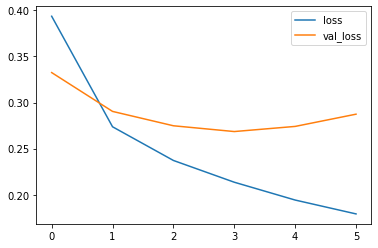

In [48]:
perdidas[['loss', 'val_loss']].plot()

In [53]:
print(modelo.metrics_names)
print(modelo.evaluate(X_prueba, y_cat_prueba, verbose = 0))

['loss', 'accuracy']
[0.28734779357910156, 0.9072999954223633]


In [54]:
from sklearn.metrics import classification_report, confusion_matrix

In [58]:
predict_x=modelo.predict(X_prueba) 
classes_x=np.argmax(predict_x,axis=1)

313/313 [==============================] - 5s 6ms/step


In [59]:
y_cat_prueba.shape

(10000, 10)

In [60]:
y_cat_prueba[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [62]:
classes_x[0]

9

In [63]:
y_prueba

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [64]:
print(classification_report(y_prueba, classes_x))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1000
           1       0.99      0.97      0.98      1000
           2       0.87      0.84      0.85      1000
           3       0.91      0.92      0.92      1000
           4       0.84      0.86      0.85      1000
           5       0.96      0.99      0.97      1000
           6       0.72      0.75      0.74      1000
           7       0.97      0.94      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.96      0.97      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [65]:
confusion_matrix(y_prueba, classes_x)

array([[850,   1,  14,   8,   6,   1, 115,   0,   5,   0],
       [  2, 973,   1,  14,   2,   0,   5,   0,   3,   0],
       [ 10,   0, 839,   7,  73,   0,  71,   0,   0,   0],
       [ 15,   6,  10, 920,  13,   1,  33,   0,   2,   0],
       [  0,   1,  39,  35, 861,   1,  63,   0,   0,   0],
       [  0,   0,   0,   0,   0, 986,   0,   8,   1,   5],
       [ 92,   1,  58,  20,  71,   0, 750,   0,   8,   0],
       [  0,   0,   0,   0,   0,  19,   0, 945,   1,  35],
       [  3,   0,   2,   2,   3,   6,   2,   1, 980,   1],
       [  0,   0,   0,   0,   0,  12,   1,  18,   0, 969]], dtype=int64)

In [66]:
import seaborn as sns

<AxesSubplot:>

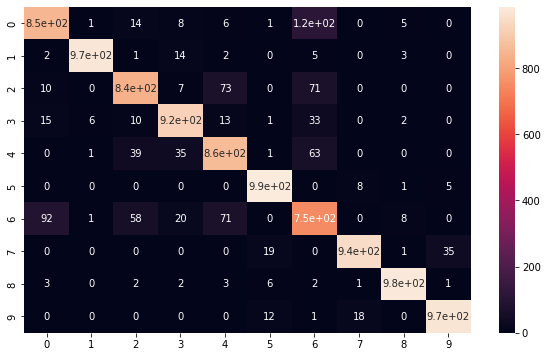

In [68]:
plt.figure(figsize = (10, 6))
sns.heatmap(confusion_matrix(y_prueba,classes_x),annot = True)

# Gran trabajo!